## Pocket Perceptron in Python

### By Thomas Oswald

#### Spring 2020, DATA 4319

The Pocket Algorithm is a perceptron learning algorithm with a memory which keeps the result of the iteration.  In this notebook, I will create the pocket algorithm and implement it on the iris dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
data = pd.read_csv('iris_data.csv')
data.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


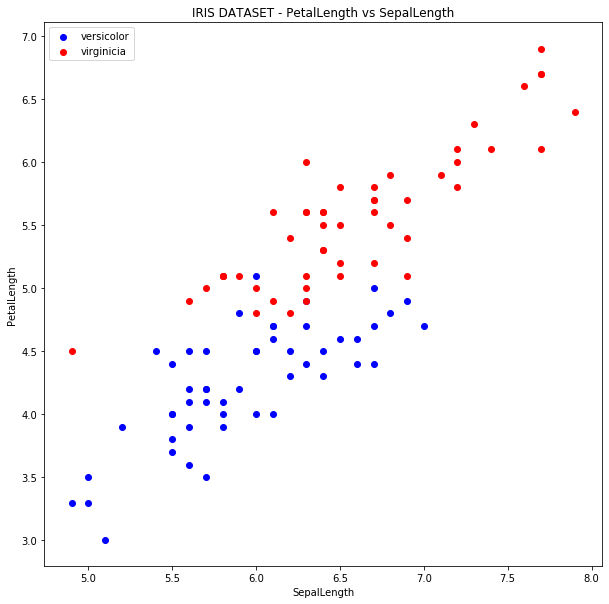

In [3]:
# Read in the Iris Dataset csv
data = pd.read_csv('iris_data.csv')
data = data.loc[data['Species'] != "setosa"]
Species = data['Species']

# Y is the species identifier
Y = []
for i in Species:
    if i == 'versicolor':
        Y.append(1)
    else:
        Y.append(-1)
        
        
data = data.drop(['SepalWidth', 'PetalWidth','Species'], axis = 1)
data.insert(2,"Bias", np.ones(100))

# X are the two measurements from the IRIS dataset
X = data.values

# These subsets are just for plotting
x1 = data.iloc[0:50,0:4].values
x2 = data.iloc[50:101,0:4].values

# plot
fig = plt.figure(figsize=(10,10))

plt.scatter(x1[0:50,0],
            x1[0:50,1],
            color = 'blue',
            label = "versicolor")

plt.scatter(x2[0:50,0],
            x2[0:50,1],
            color = 'red',
            label = "virginicia")

plt.title("IRIS DATASET - PetalLength vs SepalLength")
plt.xlabel('SepalLength')
plt.ylabel('PetalLength')
plt.legend()

### Define Essential Functions

In [4]:
def sign(w,x):
    if np.dot(np.transpose(w),x) > 0:
        return 1
    else:
        return -1

def errors(w):
    e = 0
    for i in range(len(X)):
        if sign(w, X[i].reshape(3,1)) != Y[i]:
            e += 1/len(X)
        else:
            e += 0
    return e
            
def pocket_algo(t):
    w = np.random.randn(3)
    w_hat = w
    for i in range(t):
        for j in range(len(X)):
            if sign(w, X[j].reshape(3,1)) != Y[j]:
                w += Y[j] * X[j]
        
        if errors(w) < errors(w_hat):
            w_hat = w

    return w_hat

In [70]:
W = pocket_algo(500)
W

array([ 131.44676875, -200.39731975,   97.53431272])

In [71]:
errors(W)

0.16

### plotting

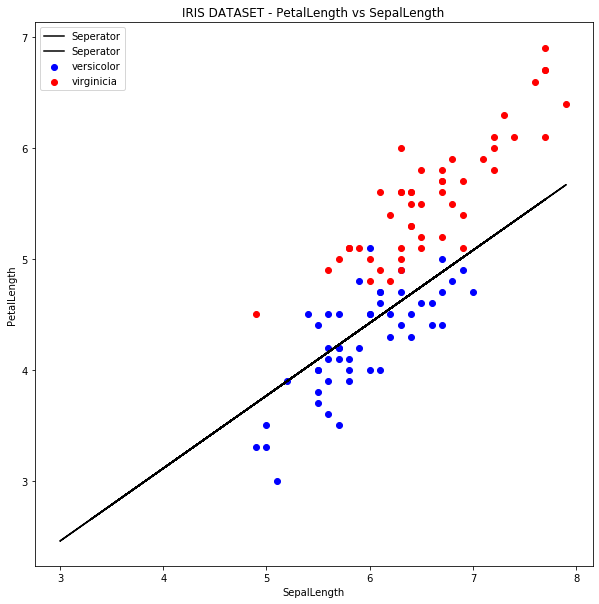

In [72]:
# plot

y_new = -(W[0]/W[1])*X[:,0:2] - (W[2]/W[1])

fig = plt.figure(figsize=(10,10))

plt.scatter(x1[0:50,0],
            x1[0:50,1],
            color = 'blue',
            label = "versicolor")

plt.scatter(x2[0:50,0],
            x2[0:50,1],
            color = 'red',
            label = "virginicia")

plt.plot(X[:,0:2],
         y_new,
         color = 'black',
         label = 'Seperator')

plt.title("IRIS DATASET - PetalLength vs SepalLength")
plt.xlabel('SepalLength')
plt.ylabel('PetalLength')
plt.legend()

In summary, the Pocket Algorithm uses memory to store weighted values and compare its values with the next iteration of weights. The weighted values with the smaller error percent are the ones that are kept and used for comparing in the next iteration.

Due to the mixture of the 2 clusters, the lowest prcet error that i could obtain was 16.6%. If compared to different clusters that we not mixed, a lower error percent could be obtained.